# Linear Classifiers in Python

## Applying logistic regression and SVM

### KNN classification

In this exercise you'll explore a subset of the [Large Movie Review
Dataset](https://ai.stanford.edu/~amaas/data/sentiment/). The variables
`X_train`, `X_test`, `y_train`, and `y_test` are already loaded into the
environment. The `X` variables contain features based on the words in
the movie reviews, and the `y` variables contain labels for whether the
review sentiment is positive (+1) or negative (-1).

*This course touches on a lot of concepts you may have forgotten, so if
you ever need a quick refresher, download the [scikit-learn Cheat
Sheet](https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning)
and keep it handy!*

**Instructions**

- Create a KNN model with default hyperparameters.
- Fit the model.
- Print out the prediction for the test example 0.

**Answer**


In [85]:
pip install numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
# added/edited
import numpy as np
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('aclImdb/train/labeledBow.feat')
X_test, y_test = load_svmlight_file('aclImdb/test/labeledBow.feat')
y_train = np.where(y_train < 5, -1.0, 1.0)
y_test = np.where(y_test < 5, -1.0, 1.0)
X_train = X_train[:, :X_test.shape[1]]

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Prediction for test example 0: -1.0


### Running LogisticRegression and SVC

In this exercise, you'll apply logistic regression and a support vector
machine to classify images of handwritten digits.

**Instructions**

- Apply logistic regression and SVM (using `SVC()`) to the handwritten
  digits data set using the provided train/validation split.
- For each classifier, print out the training and validation accuracy.

**Answer**


In [88]:
# added/edited
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [89]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))


1.0
0.9733333333333334
0.9948032665181886
0.9888888888888889


/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Sentiment analysis for movie reviews

In this exercise you'll explore the probabilities outputted by logistic
regression on a subset of the [Large Movie Review
Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

The variables `X` and `y` are already loaded into the environment. `X`
contains features based on the number of times words appear in the movie
reviews, and `y` contains labels for whether the review sentiment is
positive (+1) or negative (-1).

**Instructions**

- Train a logistic regression model on the movie review data.
- Predict the probabilities of negative vs. positive for the two given
  reviews.
- Feel free to write your own reviews and get probabilities for those
  too!

**Answer**


In [90]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
# added/edited
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vocabulary = pd.read_csv('aclImdb/imdb.vocab', header=None, names=['word']).drop_duplicates()['word'].values

X, y = load_svmlight_file('aclImdb/train/labeledBow.feat')
y = np.where(y < 5, -1.0, 1.0)
X = X[:, :len(vocabulary)]
vectorizer = CountVectorizer(vocabulary=vocabulary)
def get_features(review):
    return vectorizer.transform([review])


In [92]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])


Review: LOVED IT! This movie was amazing. Top 10 this year.
Probability of positive review: 0.9410706078385538
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: 0.210369701664537


/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizing decision boundaries

In this exercise, you'll visualize the decision boundaries of various
classifier types.

A subset of `scikit-learn`'s built-in `wine` dataset is already loaded
into `X`, along with binary labels in `y`.

**Instructions**

- Create the following classifier objects with default hyperparameters:
  `LogisticRegression`, `LinearSVC`, `SVC`, `KNeighborsClassifier`.
- Fit each of the classifiers on the provided data using a `for` loop.
- Call the `plot_4_classifers()` function (similar to the code
  [here](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)),
  passing in `X`, `y`, and a list containing the four classifiers.

**Answer**


In [93]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
# added/edited
import matplotlib.pyplot as plt 
X = np.array([[11.45,  2.4 ], [13.62,  4.95], [13.88,  1.89], [12.42,  2.55], [12.81,  2.31], [12.58,  1.29], [13.83,  1.57], [13.07,  1.5 ], [12.7 ,  3.55], [13.77,  1.9 ], [12.84,  2.96], [12.37,  1.63], [13.51,  1.8 ], [13.87,  1.9 ], [12.08,  1.39], [13.58,  1.66], [13.08,  3.9 ], [11.79,  2.13], [12.45,  3.03], [13.68,  1.83], [13.52,  3.17], [13.5 ,  3.12], [12.87,  4.61], [14.02,  1.68], [12.29,  3.17], [12.08,  1.13], [12.7 ,  3.87], [11.03,  1.51], [13.32,  3.24], [14.13,  4.1 ], [13.49,  1.66], [11.84,  2.89], [13.05,  2.05], [12.72,  1.81], [12.82,  3.37], [13.4 ,  4.6 ], [14.22,  3.99], [13.72,  1.43], [12.93,  2.81], [11.64,  2.06], [12.29,  1.61], [11.65,  1.67], [13.28,  1.64], [12.93,  3.8 ], [13.86,  1.35], [11.82,  1.72], [12.37,  1.17], [12.42,  1.61], [13.9 ,  1.68], [14.16,  2.51]])
y = np.array([ True,  True, False,  True,  True,  True, False, False,  True, False,  True,  True, False, False,  True, False,  True,  True, True, False,  True,  True,  True, False,  True,  True,  True, True,  True,  True,  True,  True, False,  True,  True,  True, False, False,  True,  True,  True,  True, False, False, False, True,  True,  True, False,  True])

In [95]:
# added/edited
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax
    

def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)

<>:66: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2885/3944463996.py:66: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


/tmp/ipykernel_2885/3944463996.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3944463996.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3944463996.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3944463996.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3944463996.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/

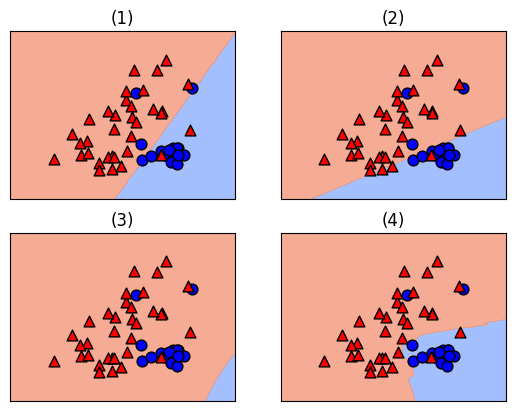

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(),
               SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()


## Loss functions

### Changing the model coefficients

When you call `fit` with scikit-learn, the logistic regression
coefficients are automatically learned from your dataset. In this
exercise you will explore how the decision boundary is represented by
the coefficients. To do so, you will change the coefficients manually
(instead of with `fit`), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as `X` and `y`,
along with a linear classifier object `model`.

**Instructions**

- Set the two coefficients and the intercept to various values and
  observe the resulting decision boundaries.
- Try to build up a sense of how the coefficients relate to the decision
  boundary.
- Set the coefficients and intercept such that the model makes no errors
  on the given training data.

**Answer**


In [97]:
# added/edited
from sklearn.linear_model import LogisticRegression
X = np.array([[ 1.78862847, 0.43650985], [ 0.09649747, -1.8634927 ], [-0.2773882 , -0.35475898], [-3.08274148, 2.37299932], [-3.04381817, 2.52278197], [-1.31386475, 0.88462238], [-2.11868196, 4.70957306], [-2.94996636, 2.59532259], [-3.54535995, 1.45352268], [ 0.98236743, -1.10106763], [-1.18504653, -0.2056499 ], [-1.51385164, 3.23671627], [-4.02378514, 2.2870068 ], [ 0.62524497, -0.16051336], [-3.76883635, 2.76996928], [ 0.74505627, 1.97611078], [-1.24412333, -0.62641691], [-0.80376609, -2.41908317], [-0.92379202, -1.02387576], [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1])
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

/tmp/ipykernel_2885/3944463996.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3944463996.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


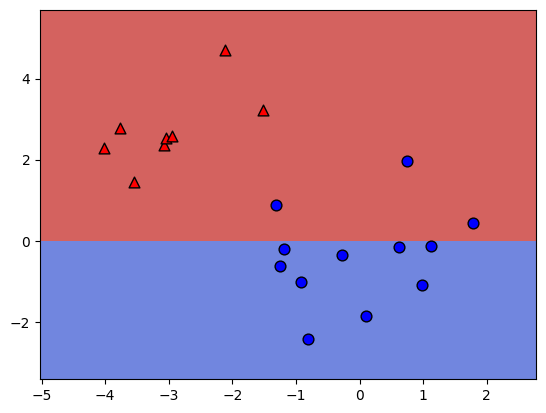

Number of errors: 3


In [98]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

### Minimizing a loss function

In this exercise you'll implement linear regression "from scratch" using
`scipy.optimize.minimize`.

We'll train a model on the Boston housing price data set, which is
already loaded into the variables `X` and `y`. For simplicity, we won't
include an intercept in our regression model.

**Instructions**

- Fill in the loss function for least squares linear regression.
- Print out the coefficients from fitting sklearn's `LinearRegression`.

**Answer**


In [99]:
# added/edited
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
boston = np.genfromtxt('boston.csv', delimiter=',', skip_header=1)
X = boston[:, :-1]
y = boston[:, -1]

In [100]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)


[-0.0910727   0.04843059 -0.0092203   2.84376175 -2.70682126  5.92068105
 -0.0069313  -0.96899338  0.16606771 -0.00913894 -0.39533263  0.01500011
 -0.41893766]
[-0.09107247  0.04843025 -0.00922329  2.84376422 -2.70689566  5.92067655
 -0.00693123 -0.96899503  0.16606245 -0.00913851 -0.39533609  0.01500025
 -0.41893787]


### Comparing the logistic and hinge losses

In this exercise you'll create a plot of the logistic and hinge losses
using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

**Instructions**

- Evaluate the `log_loss()` and `hinge_loss()` functions **at the grid
  points** so that they are plotted.

**Answer**


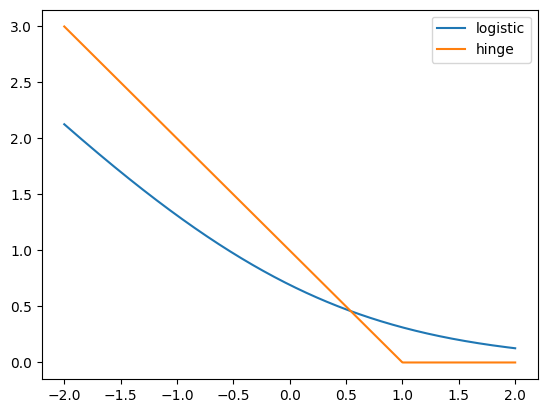

In [101]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()


### Implementing logistic regression

This is very similar to the earlier exercise where you implemented
linear regression "from scratch" using `scipy.optimize.minimize`.
However, this time we'll minimize the logistic loss and compare with
scikit-learn's `LogisticRegression` (we've set `C` to a large value to
disable regularization; more on this in Chapter 3!).

The `log_loss()` function from the previous exercise is already defined
in your environment, and the `sklearn` breast cancer prediction dataset
(first 10 features, standardized) is loaded into the variables `X` and
`y`.

**Instructions**

- Input the number of training examples into `range()`.
- Fill in the loss function for logistic regression.
- Compare the coefficients to sklearn's `LogisticRegression`.

**Answer**


In [102]:
# added/edited
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
breast = np.genfromtxt('breast.csv', delimiter=',', skip_header=1)
X = breast[:, :-1]
y = breast[:, -1]

In [103]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03554622 -1.65377841  4.08373462 -9.40922302 -1.06786355  0.07890367
 -0.85110636 -2.44100368 -0.4528488   0.43353788]
[[ 2.71458587 -1.65402326  2.18958756 -9.29661809 -1.08819416  0.20522475
  -0.85716057 -2.396583   -0.45787656  0.42168857]]


## Logistic regression

### Regularized logistic regression

In Chapter 1, you used logistic regression on the handwritten digits
data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in
the variables `X_train`, `y_train`, `X_valid`, and `y_valid`. The
variables `train_errs` and `valid_errs` are already initialized as empty
lists.

**Instructions**

- Loop over the different values of `C_value`, creating and fitting a
  `LogisticRegression` model each time.
- Save the error on the training set and the validation set for each
  model.
- Create a plot of the training and testing error as a function of the
  regularization parameter, `C`.
- Looking at the plot, what's the best value of `C`?

**Answer**


In [104]:
# added/edited
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

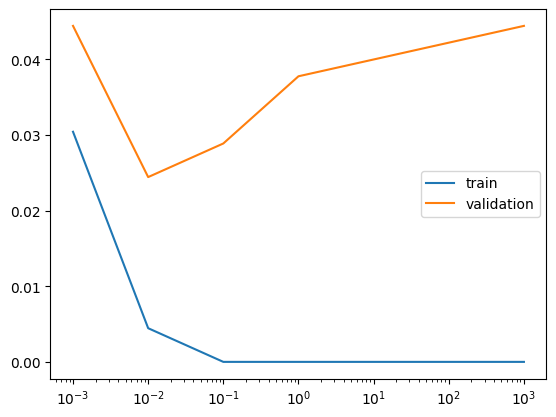

In [105]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

### Logistic regression and feature selection

In this exercise we'll perform feature selection on the movie review
sentiment data set using L1 regularization. The features and targets are
already loaded for you in `X_train` and `y_train`.

We'll search for the best value of `C` using scikit-learn's
`GridSearchCV()`, which was covered in the prerequisite course.

**Instructions**

- Instantiate a logistic regression object that uses L1 regularization.
- Find the value of `C` that minimizes cross-validation error.
- Print out the number of selected features for this value of `C`.

**Answer**


In [106]:
# added/edited
from sklearn.model_selection import GridSearchCV
X_train, y_train = load_svmlight_file('aclImdb/train/labeledBow.feat')
y_train = np.where(y_train < 5, -1.0, 1.0)

In [107]:
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 89527
Number of selected features: 1106


### Identifying the most positive and negative words

In this exercise we'll try to interpret the coefficients of a logistic
regression fit on the movie review sentiment dataset. The model object
is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are
loaded into the variable `vocab`. For example, since `vocab[100]` is
"think", that means feature 100 corresponds to the number of times the
word "think" appeared in that movie review.

**Instructions**

- Find the words corresponding to the 5 largest coefficients.
- Find the words corresponding to the 5 smallest coefficients.

**Answer**


In [108]:
# added/edited
vocab = pd.read_csv('aclImdb/imdb.vocab', header=None, names=['word']).drop_duplicates()['word'].values
lr = best_lr

In [109]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")


Most positive words: excellent, refreshing, wonderfully, perfect, superb, 

Most negative words: waste, worst, disappointment, poorly, awful, 



### Regularization and probabilities

In this exercise, you will observe the effects of changing the
regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the
environment as `X` and `y`.

**Instructions**

- Compute the maximum predicted probability.
- Run the provided code and take a look at the plot.

<!-- -->

- Create a model with `C=0.1` and examine how the plot and probabilities
  change.

**Answer**


In [122]:
# added/edited
binary = pd.read_csv('binary.csv', header=None).to_numpy()
X = binary[:, :-1]
y = binary[:, -1]

/tmp/ipykernel_2885/3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


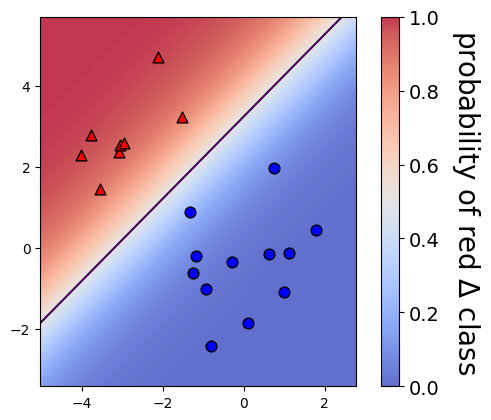

Maximum predicted probability 0.9973152198703695


In [123]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

/tmp/ipykernel_2885/3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


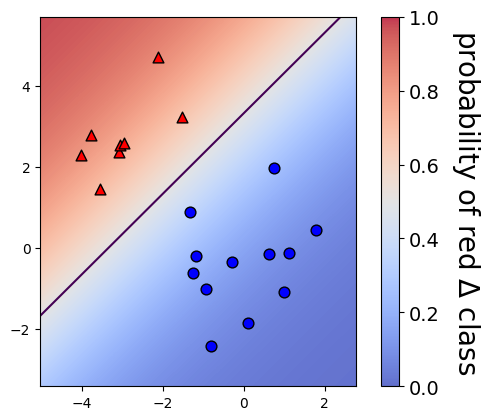

Maximum predicted probability 0.9351932155190785


In [124]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

### Visualizing easy and difficult examples

In this exercise, you'll visualize the examples that the logistic
regression model is most and least confident about by looking at the
largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables `X`
and `y`. The `show_digit` function takes in an integer index and plots
the corresponding image, with some extra information displayed above the
image.

**Instructions**

- Fill in the first blank with the *index* of the digit that the model
  is most confident about.
- Fill in the second blank with the *index* of the digit that the model
  is least confident about.
- Observe the images: do you agree that the first one is less ambiguous
  than the second?

**Answer**


In [127]:
# added/edited
X, y = digits.data, digits.target
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', 
               vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
        plt.show()

/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_2885/3635067261.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))


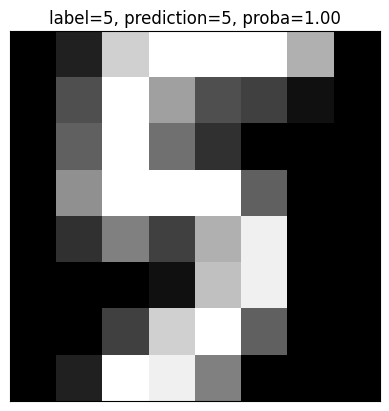

/tmp/ipykernel_2885/3635067261.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))


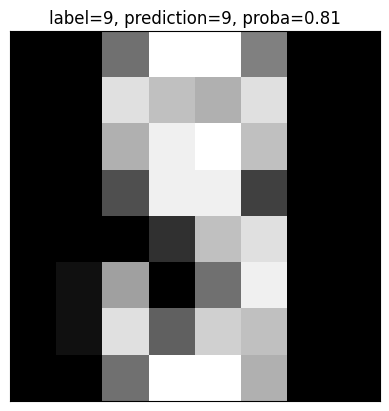

In [128]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)


### Fitting multi-class logistic regression

In this exercise, you'll fit the two types of multi-class logistic
regression, one-vs-rest and softmax/multinomial, on the handwritten
digits data set and compare the results. The handwritten digits dataset
is already loaded and split into `X_train`, `y_train`, `X_test`, and
`y_test`.

**Instructions**

- Fit a one-vs-rest logistic regression classifier by setting the
  `multi_class` parameter and report the results.
- Fit a multinomial logistic regression classifier by setting the
  `multi_class` parameter and report the results.

**Answer**


In [140]:
# added/edited
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [143]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class="ovr")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OVR training accuracy: 0.9962880475129918
OVR test accuracy    : 0.9511111111111111
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9511111111111111


/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizing multi-class logistic regression

In this exercise we'll continue with the two types of multi-class
logistic regression, but on a toy 2D data set specifically designed to
break the one-vs-rest scheme.

The data set is loaded into `X_train` and `y_train`. The two logistic
regression objects,`lr_mn` and `lr_ovr`, are already instantiated (with
`C=100`), fit, and plotted.

Notice that `lr_ovr` never predicts the dark blue class… yikes! Let's
explore why this happens by plotting one of the binary classifiers that
it's using behind the scenes.

**Instructions**

- Create a new logistic regression object (also with `C=100`) to be used
  for binary classification.
- Visualize this binary classifier with `plot_classifier`… does it look
  reasonable?

**Answer**


In [155]:
# added/edited
toy_train = pd.read_csv('toy_train.csv', header=None).to_numpy()
X_train = toy_train[:, :-1]
y_train = toy_train[:, -1]

In [156]:
lr_mn = LogisticRegression(C=100, multi_class='multinomial')
lr_mn.fit(X_train, y_train)
lr_ovr = LogisticRegression(C=100, multi_class='ovr')
lr_ovr.fit(X_train, y_train)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, multi_class='ovr')

Softmax     training accuracy: 0.996
One-vs-rest training accuracy: 0.916


/tmp/ipykernel_2885/3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


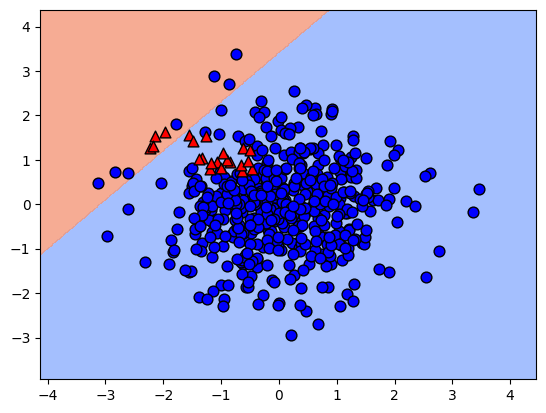

In [157]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

### One-vs-rest SVM

As motivation for the next and final chapter on support vector machines,
we'll repeat the previous exercise with a non-linear SVM. Once again,
the data is loaded into `X_train`, `y_train`, `X_test`, and `y_test` .

Instead of using `LinearSVC`, we'll now use scikit-learn's `SVC` object,
which is a non-linear "kernel" SVM (much more on what this means in
Chapter 4!). Again, your task is to create a plot of the binary
classifier for class 1 vs. rest.

**Instructions**

- Fit an `SVC` called `svm_class_1` to predict class 1 vs. other
  classes.
- Plot this classifier.

**Answer**


/tmp/ipykernel_2885/3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipykernel_2885/3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


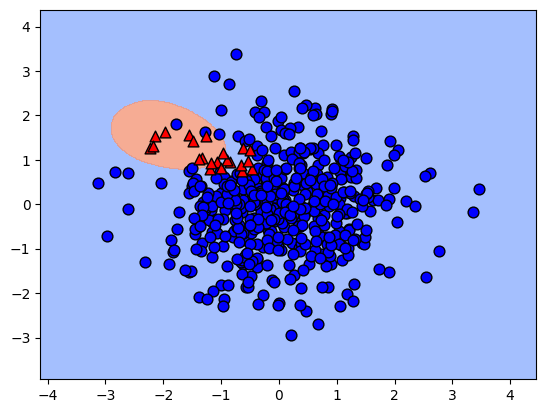

In [158]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)


## Support Vector Machines

### Effect of removing examples

Support vectors are defined as training examples that influence the
decision boundary. In this exercise, you'll observe this behavior by
removing non support vectors from the training set.

The wine quality dataset is already loaded into `X` and `y` (first two
features only). (Note: we specify `lims` in `plot_classifier()` so that
the two plots are forced to use the same axis limits and can be compared
directly.)

**Instructions**

- Train a linear SVM on the whole data set.
- Create a new data set containing only the support vectors.
- Train a new linear SVM on the smaller data set.

**Answer**


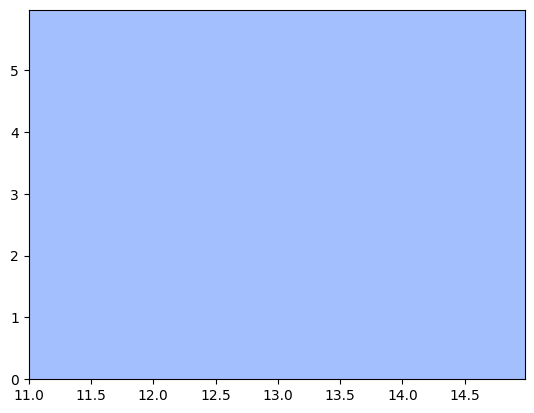

Number of original examples 500
Number of support vectors 147


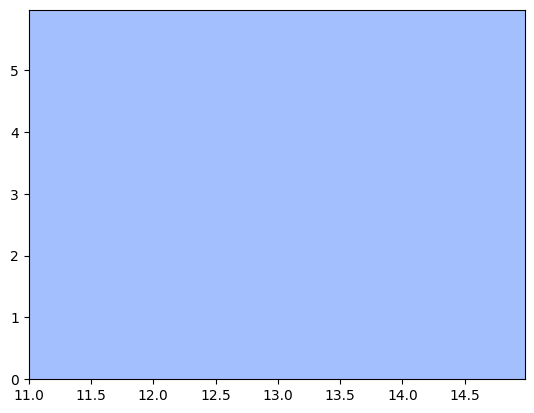

In [159]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))


### GridSearchCV warm-up

In the video we saw that increasing the RBF kernel hyperparameter
`gamma` increases training accuracy. In this exercise we'll search for
the `gamma` that maximizes cross-validation accuracy using
scikit-learn's `GridSearchCV`. A binary version of the handwritten
digits dataset, in which you're just trying to predict whether or not an
image is a "2", is already loaded into the variables `X` and `y`.

**Instructions**

- Create a `GridSearchCV` object.
- Call the `fit()` method to select the best value of `gamma` based on
  cross-validation accuracy.

**Answer**


In [160]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)


Best CV params {'gamma': 0.1}


### Jointly tuning gamma and C with GridSearchCV

In the previous exercise the best value of `gamma` was 0.001 using the
default value of `C`, which is 1. In this exercise you'll search for the
best combination of `C` and `gamma` using `GridSearchCV`.

As in the previous exercise, the 2-vs-not-2 digits dataset is already
loaded, but this time it's split into the variables `X_train`,
`y_train`, `X_test`, and `y_test`. Even though cross-validation already
splits the training set into parts, it's often a good idea to hold out a
separate test set to make sure the cross-validation results are
sensible.

**Instructions**

- Run `GridSearchCV` to find the best hyperparameters using the training
  set.
- Print the best values of the parameters.
- Print out the accuracy on the test set, which was not used during the
  cross-validation procedure.

**Answer**


In [161]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))


Best CV params {'C': 10, 'gamma': 0.1}
Best CV accuracy 0.9639999999999999


ValueError: X has 64 features, but SVC is expecting 2 features as input.

### Using SGDClassifier

In this final coding exercise, you'll do a hyperparameter search over
the regularization strength and the loss (logistic regression vs. linear
SVM) using `SGDClassifier()`.

**Instructions**

- Instantiate an `SGDClassifier` instance with `random_state=0`.
- Search over the regularization strength and the `hinge` vs. `log_loss`
  losses.

**Answer**


In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))
